In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
raw_data_states = glob.glob('data/Raw_data/*')

In [148]:
# file = 'data/Raw_data/Maharashtra/ahmednagar_10.xlsx'
# df = pd.read_excel(file, engine='openpyxl', skiprows=3)

In [149]:
for fol in raw_data_states:
    state = '_'.join(fol.split('/')[-1].lower().split(' '))
    print(state)
    files = glob.glob(fol+'/*xlsx')
    df = pd.DataFrame()
    for fname in files:
        df1 = pd.read_excel(fname, engine='openpyxl', skiprows=3)
        region =  fname.split('/')[-1] .split('_')[0].lower()
        df1['region'] = region
        df = pd.concat([df,df1])  
    df['state'] = [state]*len(df)
    try:
        os.makedirs(f'data/processed_raw_data/{state}')
    except:
        pass
    df.to_csv(f'data/processed_raw_data/{state}/data.csv', index=False)

chattisgarh
andhra_pradesh
assam
maharashtra
bihar
gujarat
haryana
odhisa


In [97]:
processed_data_list = glob.glob('data/processed_raw_data/*/*')
df = pd.DataFrame()
for fname in processed_data_list:
    df1 = pd.read_csv(fname)
    df = pd.concat([df,df1])

In [100]:
df.to_csv('data1/unfiltered_raw_data.csv', index=False)

In [101]:
col_list = df.columns.tolist()
unnamed_cols = [col for col in col_list if col.startswith('U')]
df.drop(unnamed_cols, axis=1, inplace=True)
df.shape

In [102]:
df.head()

(228189, 22)

In [ ]:
df = df[pd.to_numeric(df['Sr.No.'], errors='coerce').notnull()]

In [105]:
df.columns

Index(['Sr.No.', 'Sample No.', 'Farmer Name', 'Land Area',
       'Khasra No./ Dag No.', 'Survey No.', 'Longitude', 'Latitude', 'pH',
       'EC', 'OC', 'N', 'P', 'K', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'region',
       'state'],
      dtype='object')

In [ ]:
df.D

In [113]:
final_cols = ['Longitude', 'Latitude','N', 'P', 'K']

In [115]:
dff = df[final_cols]
dff.reset_index(drop=True, inplace=True)
dff

,Longitude,Latitude,N,P,K
0,NaN,NaN,NaN,NaN,NaN
1,84.690707,25.013306,451.87000 M,10.20000 VL,603.00000 H
2,84.689817,25.011392,313.45000 M,25.90000 M,730.00000 VH
3,84.689226,25.015323,520.40000 M,23.30000 M,365.00000 H
4,84.688463,25.016017,443.50000 M,6.50000 VL,454.00000 H
...,...,...,...,...,...
228184,NaN,NaN,NaN,NaN,NaN
228185,86.092500,20.584444,NaN,12.00000 L,114.24000 L
228186,86.092222,20.584444,NaN,9.60000 VL,89.60000 L
228187,86.089722,20.583611,NaN,3.90000 VL,79.52000 L


In [117]:
dff.dropna(inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [121]:
dff.drop_duplicates(inplace=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [126]:
dff['N']=dff['N'].str.split('\s+').str[0].astype(float)
dff['P']=dff['P'].str.split('\s+').str[0].astype(float)
dff['K']=dff['K'].str.split('\s+').str[0].astype(float)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='N', ylabel='P'>

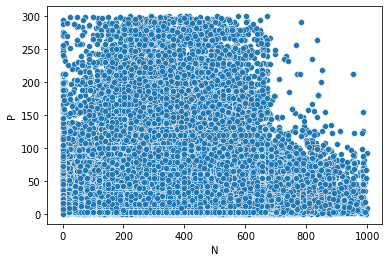

In [140]:
sns.scatterplot(dff[dff['N']<1000]['N'], dff[dff['P']<300]['P'])

In [145]:
dff.head()

,Longitude,Latitude,N,P,K
1,84.690707,25.013306,451.87,10.2,603.0
2,84.689817,25.011392,313.45,25.9,730.0
3,84.689226,25.015323,520.40,23.3,365.0
4,84.688463,25.016017,443.50,6.5,454.0
5,84.689466,25.016213,426.20,84.7,604.0
